As introducted in the topic *[Pandas] Data Cleaning*, clean data is used as the input for analytical tasks. However, to build a good predictive model (in both performance and computation), a lot more works need to be done in order to improve data quality. These kind of tasks are called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), they get data into the appropriate format and reveal hidden insights.

Feature engineering tasks are technically simple, but they do require some domain knowledge. This makes feature engineering more of an art than a science.

# 1. Data preprocessing

## 1.1. Scaling
Scaling is a preprocessing technique defined only on numerical variables, where the scaled variable distributes the same as the original one but does have specific properties.
- *Min-max scaling*: to have the min of $0$ and max of $1$
- *Standardization*: to have the mean of $0$ and standard deviation of $1$
- *Manhattan normalization*: to have the absolute values sum up to $1$
- *Euclidean normalization*: to have the squared values sum up to $1$

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(precision=4, suppress=True)

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

### Min-max scaling
Many Machine Learning algorithms assume all variables are on the same scale, typically $[0;1]$. The formula for rescaling to $[a;b]$ is:

$$\mathbf{x}'=\frac{\mathbf{x}-\mathbf{x}_{min}}{\mathbf{x}_{max}-\mathbf{x}_{min}}(b-a)+a$$

In [7]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.000000,0.896552
1,22,81,0.238095,1.000000
2,25,32,0.380952,0.155172
3,30,23,0.619048,0.000000
4,38,55,1.000000,0.551724


### Standardization
Also called *z-score* scaling, it is a technique that transforms a variable so that it has a mean of $0$ and a standard deviation of $1$. Standardization is strongly recommended as the default method for data preprocessing. The formula for standardizing $x$ is:

$$\mathbf{x}'=\frac{\mathbf{x}-\mu_\mathbf{x}}{\sigma_\mathbf{x}}$$

In [9]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,-1.310622,0.953649
1,22,81,-0.613483,1.216121
2,25,32,-0.195199,-0.927401
3,30,23,0.501940,-1.321110
4,38,55,1.617363,0.078742


### Normalizing
This technique ensures the vector has a total length of 1. The length can be either Manhattan distance (L1) $\|\mathbf{x}\|_1 = |x_1|+|x_2|+\dots+|x_n|$ or Euclidean distance (L2) $\|\mathbf{x}\|_2 = \sqrt{x_1^2+x_2^2+\dots+x_n^2}$. The formula for normalizing is:

$$\mathbf{x}'=\frac{\mathbf{x}}{\|\mathbf{x}\|}$$

In [12]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = Normalizer(norm='l1')
data_scaled = scaler.fit_transform(df.values.T).T
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.128788,0.281955
1,22,81,0.166667,0.304511
2,25,32,0.189394,0.120301
3,30,23,0.227273,0.086466
4,38,55,0.287879,0.206767


In [4]:
df = pd.DataFrame({
    'x': [17, 22, 25, 30, 38],
    'y': [75, 81, 32, 23, 55]
})

scaler = Normalizer(norm='l2')
data_scaled = scaler.fit_transform(df.values.T).T
df_scaled = pd.DataFrame(data_scaled, columns=['x_scaled', 'y_scaled'])

df.join(df_scaled)

,x,y,x_scaled,y_scaled
0,17,75,0.277905,0.579259
1,22,81,0.359642,0.625599
2,25,32,0.408684,0.247150
3,30,23,0.490421,0.177639
4,38,55,0.621200,0.424790


## 1.2. Transformation
Sometimes real world data distribute not very nice, while most transformation techiniques do not affect the distribution. Imagine the label in a regression problem is mostly small values, then Machine Learning algorithms will have a hard time *learning* higher values. By taking advantage of mathematical functions, Data Scientists can control the distribution of data to make them more *nature*.

This section covers the most notable transformations. Some other basic and popular ones are:
- *Reciprocal* transformation: $\mathbf{x}=\mathbf{x}^{-1}$
- *Square root* transformation: $\mathbf{x}=\sqrt{\mathbf{x}}$
- *Exponential* transformation: $\mathbf{x}=e^{\mathbf{x}}$

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm, boxcox, yeojohnson
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Logarithm
This popular technique has the ability to make right skewed data distribute normally. The formula of the transformation is:

$$\mathbf{x}'=\log_b{(\mathbf{x}+1)}$$

Some notable tips when using log transformation:
- It works only on features contain all postive values.
- Different base values $b$ can be used, the most common ones are: $e$, $2$ and $10$.
- The quantity $1$ is added to $\mathbf{x}$ to make sure the values after the transformation are all positive, since $\log{(x+1)}>\log1=0$.

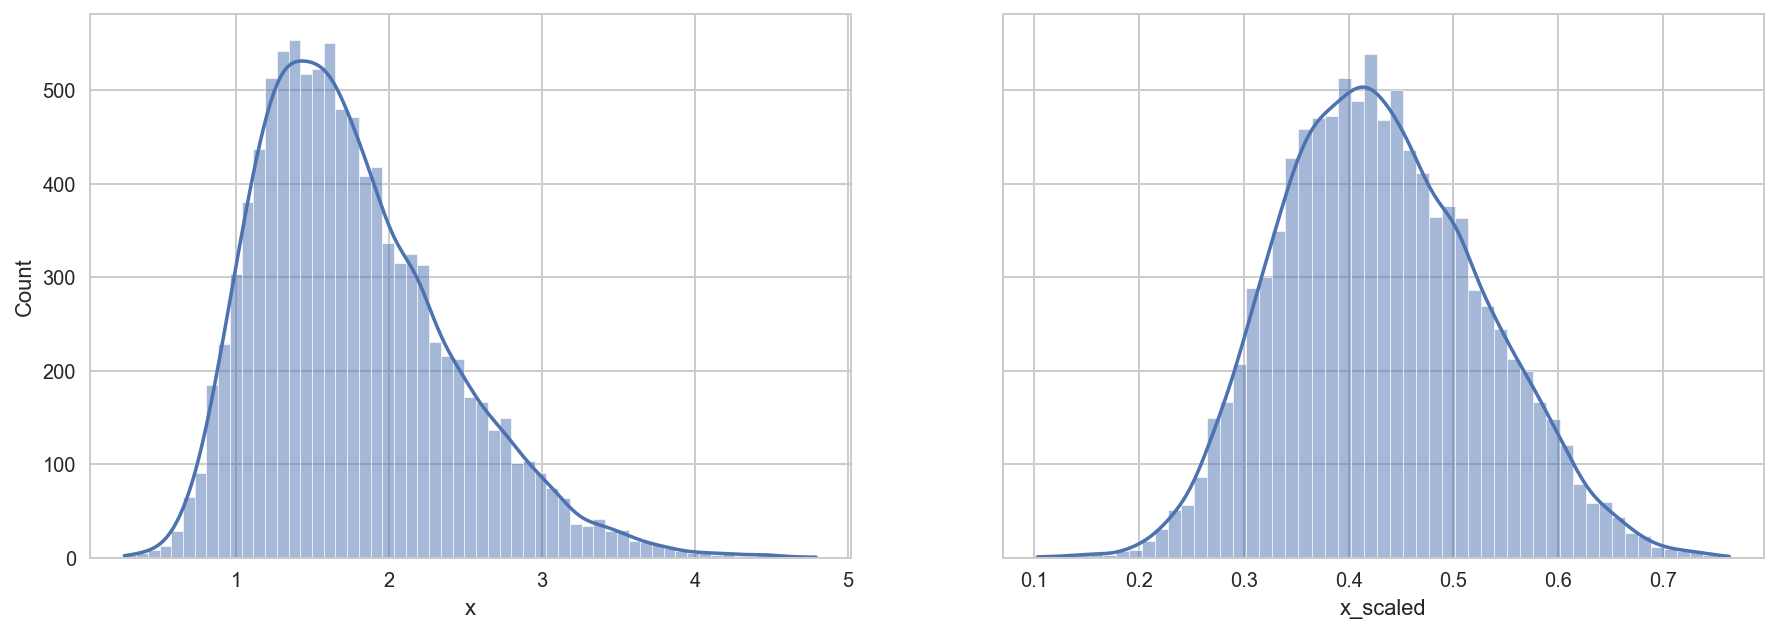

In [12]:
np.random.seed(7)
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=np.log10(df.x+1))

fig, ax = plt.subplots(1, 2, figsize=(15,5), sharey=True)
sns.histplot(df.x, ax=ax[0], kde=True, edgecolor='w')
sns.histplot(df.x_scaled, ax=ax[1], kde=True, edgecolor='w')
plt.show()

### Box-Cox
[Box-Cox transform](https://en.wikipedia.org/wiki/Power_transform#Box–Cox_transformation) is a member of [power transform](https://en.wikipedia.org/wiki/Power_transform) family. It has the effect of making data more normal distribution-like. The transformation is given by a [piecewise function](https://en.wikipedia.org/wiki/Piecewise) as below:

$$
\mathbf{x}'=
\begin{cases}
    {\dfrac {\mathbf{x}^{\lambda}-1}{\lambda}}&{\text{if }}\lambda\neq 0\\
    \log\mathbf{x}&{\text{if }}\lambda=0
\end{cases}
$$

By default, the
<code style='font-size:13px;'><a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html'>scipy.stats.boxcox()</a></code>
function estimates the value of $\lambda$ that maximizes the log-likelihood function.

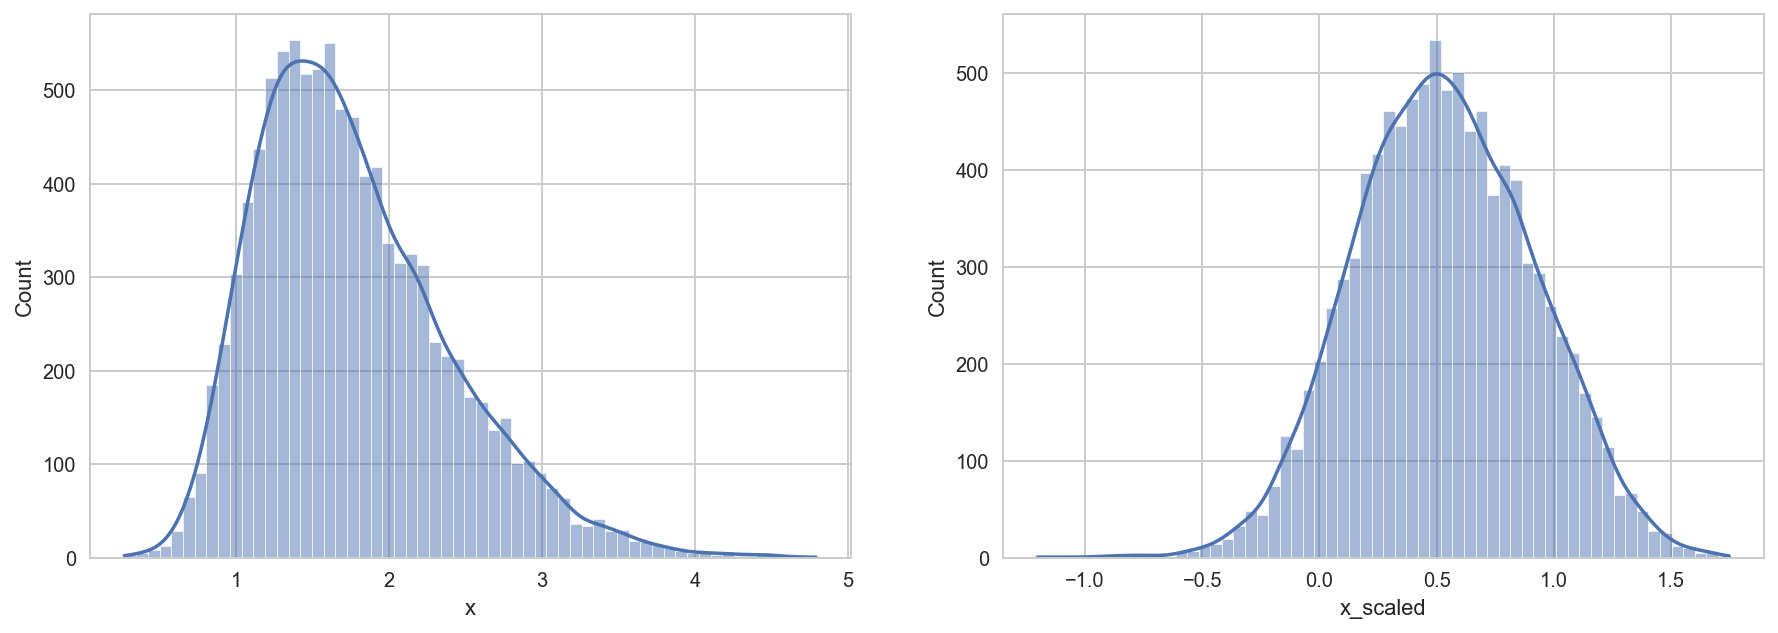

In [10]:
np.random.seed(7)
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=boxcox(df.x)[0])

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df.x, ax=ax[0], kde=True, edgecolor='w')
sns.histplot(df.x_scaled, ax=ax[1], kde=True, edgecolor='w')
plt.show()

In [7]:
x = np.array([1, 2, 3, 4])
xScaled, lmbda = boxcox(x)

### Yeo-Johnson
[Yeo-Johnson transform](https://en.wikipedia.org/wiki/Power_transform#Yeo–Johnson_transformation) is another member of power transform family. It extends Box-Cox transform to handle nagative input data, using the following function:

$$
\mathbf{x}'=
\begin{cases}
    \dfrac{(\mathbf{x}+1)^{\lambda}-1}{\lambda}       & \text{if }\lambda\neq 0\text{ and }\mathbf{x}\geq 0 \\
    \log(\mathbf{x}+1)                                & \text{if }\lambda=    0\text{ and }\mathbf{x}\geq 0 \\
    -\dfrac{(-\mathbf{x}+1)^{2-\lambda}-1}{2-\lambda} & \text{if }\lambda\neq 2\text{ and }\mathbf{x}\leq 0 \\
    -\log(-\mathbf{x}+1)                              & \text{if }\lambda=    0\text{ and }\mathbf{x}\geq 0 \\
\end{cases}
$$

By default, the
<code style='font-size:13px;'><a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html'>scipy.stats.yeojohnson()</a></code>
function estimates the value of $\lambda$ that maximizes the log-likelihood function.

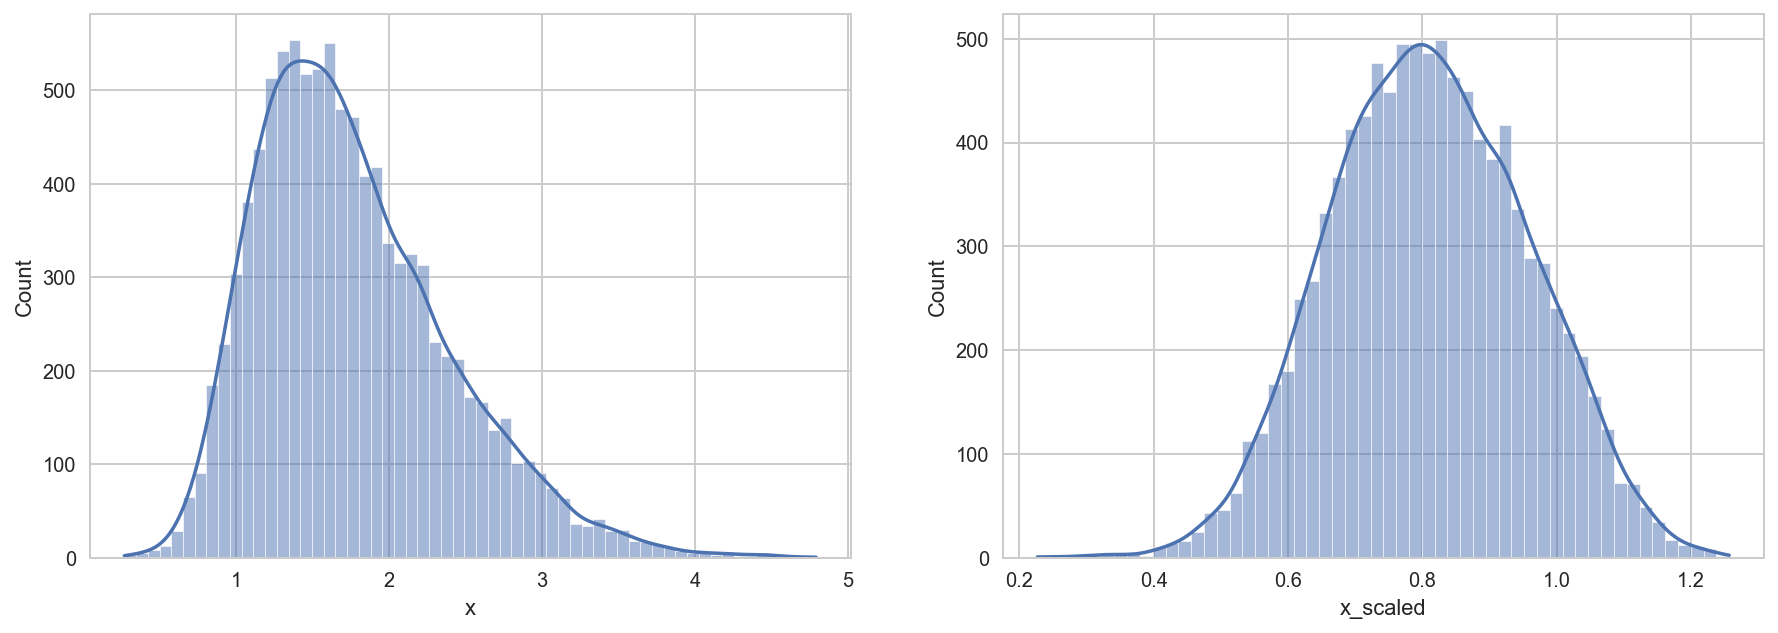

In [11]:
np.random.seed(7)
df = pd.DataFrame({'x': skewnorm.rvs(a=4, loc=1, size=10000)})
df = df.assign(x_scaled=yeojohnson(df.x)[0])

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df.x, ax=ax[0], kde=True, edgecolor='w')
sns.histplot(df.x_scaled, ax=ax[1], kde=True, edgecolor='w')
plt.show()

## 1.2. Bucketizing
Bucketizing (or binning) refers to the tasks that put data into larger bins. Doing bucketizing means sacrifying information, however it makes data more regularized and thus prevents overfitting. Either numerical and categorical variables can be binned.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

### Discretizating

In [34]:
df = pd.DataFrame({'x': [17, 22, 25, 30, 38]})

group = pd.cut(
    df.x,
    bins=[0, 20, 30, 100],
    right=False,
    labels=['A', 'B', 'C'])

df.assign(group=group)

,x,group
0,17,A
1,22,B
2,25,B
3,30,C
4,38,C


### Clustering

In [48]:
np.random.seed(1)
df = pd.DataFrame({
    'x': np.random.randint(10, 100, size=10),
    'y': np.random.randint(10, 100, size=10)
})

clusterer = KMeans(3, random_state=0)
group = clusterer.fit_predict(df.values)

df.assign(group=group)

,x,y,group
0,47,86,2
1,22,81,2
2,82,16,1
3,19,35,0
4,85,60,1
5,15,30,0
6,89,28,1
7,74,94,2
8,26,21,0
9,11,38,0


### Mapping

In [2]:
df = pd.DataFrame({'x': ['England', 'France', 'Germany', 'Korea', 'Japan']})

x_map = df.x.map({
    'England': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Korea': 'Asia', 'Japan': 'Asia'
})

df.assign(x_map=x_map)

,x,x_map
0,England,Europe
1,France,Europe
2,Germany,Europe
3,Korea,Asia
4,Japan,Asia


## 1.3. Encoding
Encoding is the technique that transforms a categorical variable to numerical variables.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

### Mapping
Mapping is used to transform ordinal data to numerical data.

In [16]:
df = pd.DataFrame({
    'x': ['Low', 'Medium', 'High', 'High', 'Medium']
})

x_encoded = df.x.map({'Low': 1, 'Medium': 2, 'High': 3})

df.assign(x_encoded=x_encoded)

,x,x_encoded
0,Low,1
1,Medium,2
2,High,3
3,High,3
4,Medium,2


### One-hot encoding
This technique is used to transform nominal data to numerical data.

In [15]:
df = pd.DataFrame({
    'x': ['Apple', 'Apple', 'Orange', 'Mango', 'Apple']
})

encoder = LabelBinarizer()
x_encoded = pd.DataFrame(
    data=encoder.fit_transform(df.x.values.reshape(-1,1)),
    columns=encoder.classes_)

df.join(x_encoded)

,x,Apple,Mango,Orange
0,Apple,1,0,0
1,Apple,1,0,0
2,Orange,0,0,1
3,Mango,0,1,0
4,Apple,1,0,0


# 2. Feature synthesis
- https://featuretools.alteryx.com/en/stable/
- https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219
- https://www.kaggle.com/code/willkoehrsen/automated-feature-engineering-basics/notebook#Deep-Feature-Synthesis

## 2.1. Synthesis within a table

## 2.2. Aggregating across tables

# 3. Pipeline
A data science project has multiple steps of getting data, cleaning, transforming, modeling and evalutating. To make the complicated process to become easier, Scikit-learn provides the [pipeline](https://scikit-learn.org/stable/modules/compose.html) module. The purpose of the pipeline is to assemble several steps sequentially and can be reused for different datasets in the future.

## 3.1. Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
np.set_printoptions(precision=4, suppress=True)

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
dfTitanic = pd.read_csv('data/titanic_train.csv')

x = dfTitanic.drop(columns='Survived')
y = dfTitanic.Survived

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [3]:
xTrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
773,774,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C


### Simple pipeline
A simple preprocesing pipeline applies transformers to all columns. Provided via the class
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html'>Pipeline</a></code>,
the main component we would care about is the steps, which is constructed using a list of tuples with the signature
<code style='font-size:13px'>(name, transformer)</code>.

In [4]:
trans = Pipeline([
    ('Impute', SimpleImputer(strategy='mean')),
    ('Scale', StandardScaler()),
])

trans.fit_transform(xTrain[['Age', 'Fare']])

array([[-2.1265, -0.431 ],
       [-0.    , -0.3352],
       [ 0.7519,  0.951 ],
       ...,
       [ 0.0518,  1.3934],
       [-0.    , -0.4826],
       [-0.8818, -0.4806]])

### Column transformer
The problem arises when we would probably want to apply diffrent pipelines to different subsets of features such as categorical and numerical. To tackle this, Scikit-learn provides the class
<code style='font-size:13px'><a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html'>ColumnTransformer</a></code>
which accepts a list of tuples with the signature
<code style='font-size:13px'>(name, transformer, columns)</code>.

We can use any Scikit-learn's transformer stand alone as well as a pipeline. To specify columns, the best practice is using column names, but the class also accepts column indices. Also note that if a feature appears in different steps, only the first step takes effect.

In [5]:
name1 = 'Categorical1'
cols1 = ['Ticket', 'Cabin']
trans1 = Pipeline([
    ('Impute', SimpleImputer(strategy='constant')),
    ('Encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

name2 = 'Categorical2'
cols2 = ['Sex', 'Embarked']
trans2 = OneHotEncoder(handle_unknown='ignore')

name3 = 'Numerical'
cols3 = ['Age', 'Fare']
trans3 = Pipeline([
    ('Impute', KNNImputer(n_neighbors=5)),
    ('Scale', StandardScaler()),
    ('Transform', FunctionTransformer(lambda x: np.exp(x)))
])

name4 = 'Integer'
cols4 = ['Pclass', 'SibSp', 'Parch']
trans4 = 'passthrough'

name5 = 'Unique'
cols5 = ['PassengerId', 'Name']
trans5 = 'drop'

In [6]:
trans = ColumnTransformer([
    (name1, trans1, cols1),
    (name2, trans2, cols2),
    (name3, trans3, cols3),
    (name4, trans4, cols4),
    (name5, trans5, cols5),
])

trans.fit(xTrain)
trans

ColumnTransformer(transformers=[('Categorical1',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(strategy='constant')),
                                                 ('Encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Ticket', 'Cabin']),
                                ('Categorical2',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked']),
                                ('Numerical',
                                 Pipeline(steps=[('Impute', KNNImputer()),
                                                 ('Scale', StandardScaler()),
                                                 ('Transform',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fd2ee59ed30>))]),
                                 ['Age', 'Fare']),
                                ('Integer', 'passthrough',
                                 ['Pclass', 'SibSp', 'Parch']),
                                ('Unique', 'drop', ['PassengerId', 'Name'])])

In [7]:
trans.transform(xTest)

array([[ -1., 126.,   0., ...,   3.,   0.,   0.],
       [ -1., 126.,   0., ...,   2.,   1.,   0.],
       [ -1., 126.,   0., ...,   3.,   0.,   0.],
       ...,
       [ -1., 126.,   0., ...,   3.,   0.,   0.],
       [ -1., 126.,   0., ...,   3.,   0.,   0.],
       [475., 126.,   1., ...,   2.,   1.,   0.]])

## 3.2. Modeling
A <code style='font-size:13px'>Pipeline</code> is very useful for data preprocessing, but it can also be used for modeling.

In [8]:
import datetime as dt
import numpy as np
import pandas as pd
from scipy import stats
np.set_printoptions(precision=4, suppress=True)

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score as AUC

In [9]:
dfTitanic = pd.read_csv('data/titanic_train.csv')

x = dfTitanic.drop(columns='Survived')
y = dfTitanic.Survived

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [10]:
xTrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
835,836,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
773,774,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C


In [11]:
name1 = 'Categorical1'
cols1 = ['Ticket', 'Cabin']
trans1 = Pipeline([
    ('Impute', SimpleImputer(strategy='constant')),
    ('Encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

name2 = 'Categorical2'
cols2 = ['Sex', 'Embarked']
trans2 = OneHotEncoder(handle_unknown='ignore')

name3 = 'Numerical'
cols3 = ['Age', 'Fare']
trans3 = Pipeline([
    ('Impute', KNNImputer(n_neighbors=5)),
    ('Scale', StandardScaler()),
])

name4 = 'Integer'
cols4 = ['Pclass', 'SibSp', 'Parch']
trans4 = 'passthrough'

name5 = 'Unique'
cols5 = ['PassengerId', 'Name']
trans5 = 'drop'

### Grid search

In [12]:
trans = ColumnTransformer([
    (name1, trans1, cols1),
    (name2, trans2, cols2),
    (name3, trans3, cols3),
    (name4, trans4, cols4),
    (name5, trans5, cols5),
])

modelRf = RandomForestClassifier(random_state=7)

pipe = Pipeline([
    ('Transformer', trans),
    ('ModelRF', modelRf)
])
pipe

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('Categorical1',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('Encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Ticket', 'Cabin']),
                                                 ('Categorical2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('Impute',
                                                                   KNNImputer()),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('Integer', 'passthrough',
                                                  ['Pclass', 'SibSp', 'Parch']),
                                                 ('Unique', 'drop',
                                                  ['PassengerId', 'Name'])])),
                ('ModelRF', RandomForestClassifier(random_state=7))])

Now we have prepare a pipeline, let's see how to use it with grid search. We have already known grid search is used to find the best hyperparameters of a model, but when coming with pipeline, it can also be used to search for the best configurations of preprocessing steps.

In [13]:
start = dt.datetime.now()

params = {
    'Transformer__Numerical__Impute__n_neighbors': [3, 5, 7],
    'ModelRF__n_estimators': [30, 50, 70],
    'ModelRF__max_features': [0.4, 0.6],
    'ModelRF__max_samples': [0.4, 0.6],
}
validator = GridSearchCV(pipe, params, cv=5, scoring='roc_auc')
validator = validator.fit(xTrain, yTrain)

print(dt.datetime.now() - start)

0:00:16.232052


In [14]:
validator.best_params_

{'ModelRF__max_features': 0.4,
 'ModelRF__max_samples': 0.4,
 'ModelRF__n_estimators': 70,
 'Transformer__Numerical__Impute__n_neighbors': 5}

In [15]:
yTestPred = validator.predict_proba(xTest)[:, 1]
auc = AUC(yTest, yTestPred)
modelName = validator.best_estimator_.steps[1][1].__class__.__name__
print(f'AUC = {auc:.4f} [{modelName}]')

AUC = 0.7995 [RandomForestClassifier]


### Model selection
To adapt pipeline to select among multiple Machine Learning algorithms, we need some tricks.

In [16]:
trans = ColumnTransformer([
    (name1, trans1, cols1),
    (name2, trans2, cols2),
    (name3, trans3, cols3),
    (name4, trans4, cols4),
    (name5, trans5, cols5),
])

pipe = Pipeline([
    ('Transformer', trans),
    ('Model', RandomForestClassifier())
])

In [17]:
start = dt.datetime.now()

params = [
    {
        'Transformer__Numerical__Impute__n_neighbors': [5, 7],
        'Model': [RandomForestClassifier()],
        'Model__n_estimators': [80, 100],
        'Model__max_samples': [0.3, 0.5],
    },
    {
        'Transformer__Numerical__Impute__n_neighbors': [5, 7],
        'Model': [HistGradientBoostingClassifier()],
        'Model__max_iter': [80, 100],
        'Model__learning_rate': [0.1, 0.05],
    }
]

validator = GridSearchCV(pipe, params, cv=5, scoring='roc_auc')
validator = validator.fit(xTrain, yTrain)

print(dt.datetime.now() - start)

0:00:21.043318


In [18]:
validator.best_params_

{'Model': HistGradientBoostingClassifier(learning_rate=0.05),
 'Model__learning_rate': 0.05,
 'Model__max_iter': 100,
 'Transformer__Numerical__Impute__n_neighbors': 5}

In [19]:
yTestPred = validator.predict_proba(xTest)[:, 1]
auc = AUC(yTest, yTestPred)
modelName = validator.best_estimator_.steps[1][1].__class__.__name__
print(f'AUC = {auc:.4f} [{modelName}]')

AUC = 0.8102 [HistGradientBoostingClassifier]


### Saving a model
The built-in package [Pickle](https://docs.python.org/3/library/pickle.html) in python let us save the model into a file and load it again to make prediction. This helps us saving the time to train the model from the begin each time we use it. In case the model is too big, [Joblib](https://joblib.readthedocs.io/en/latest/) is a good alternative. The extension of pickle files can be anything, but is usually
<code style='font-size:13px'>.p</code>
<code style='font-size:13px'>.pkl</code>
<code style='font-size:13px'>.pickle</code>
as Pickle uses Pickle protocol to read the data inside the file and ignores the extension. 

In [20]:
import pickle
filename = 'output/pipeline_model.pkl'

pickle.dump(validator, open(filename, 'wb'))

modelLoaded = pickle.load(open(filename, 'rb'))

yTestPred = modelLoaded.predict_proba(xTest)[:, 1]
auc = AUC(yTest, yTestPred)
modelName = modelLoaded.best_estimator_.steps[1][1].__class__.__name__
print(f'AUC = {auc:.4f} [{modelName}]')

AUC = 0.8102 [HistGradientBoostingClassifier]


In [22]:
import joblib
filename = 'output/pipeline_model.joblib'

joblib.dump(validator, filename)

modelLoaded = joblib.load(filename)

yTestPred = modelLoaded.predict_proba(xTest)[:, 1]
auc = AUC(yTest, yTestPred)
modelName = modelLoaded.best_estimator_.steps[1][1].__class__.__name__
print(f'AUC = {auc:.4f} [{modelName}]')

AUC = 0.8102 [HistGradientBoostingClassifier]


---
*&#9829; By Quang Hung x Thuy Linh &#9829;*